In [2]:
import numpy as np     #importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn import metrics
plt.figure(figsize=(20,10))
from sklearn.model_selection import GridSearchCV
%matplotlib inline

### Train Data Loading

In [ ]:
# reading the train data
# while data cleaning we found '+ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-','0+AHs-' this values
# unwanted, so replacing them with NaN
d1 = pd.read_csv('train2.csv',na_values=['+ACI-  +ACIAIg-status+ACIAIg- : 500+ACI-','0+AHs-'])
d1.shape

In [ ]:
#getting insight of data and null values in it
d1.info()

In [ ]:
d1.head()

In [ ]:
d1.isnull().sum()

### Data Cleaning

In [ ]:
for  col in d1.columns:
    print(col, d1[col].unique())

In [ ]:
# found that +AC0- is a misllaneous value adjoined with many data elements
# so replacing it with empty string
d1=d1.replace(to_replace='\+AC0\-' , value='', regex=True)

In [ ]:
#checking wether the data is cleaned successfully or not
for  col in d1.columns:
    print(col, d1[col].unique())

In [ ]:
d1.columns

In [ ]:
# there are few null values so using forward fill to replace them
d1_u1=d1
d1_u1=d1_u1.fillna(method='ffill')

### Manipulating Train Data

In [ ]:
# replacing column names by removing +AF8-
d1_u1.columns = ['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge','total_amount']

In [ ]:
# replacing N,Y values in stored flag wit 0,1 for ease of computation

d1_u1['stored_flag']=d1_u1['stored_flag'].replace(to_replace='N', value=0, regex=True)
d1_u1['stored_flag']=d1_u1['stored_flag'].replace(to_replace='Y', value=1, regex=True)   

In [ ]:
d1_u1.isnull().sum()   #no null value left

In [ ]:
# pickup_time and drop_time are object type so converting them to datetime type
d1_u1['pickup_time'] = pd.to_datetime(d1_u1['pickup_time'])
d1_u1['drop_time'] = pd.to_datetime(d1_u1['drop_time'])

# calculating time difference and adding a column time_diff
d1_u1['time_diff'] = d1_u1['drop_time']-d1_u1['pickup_time'] 
d1_u1['time_diff'] = pd.to_datetime(d1_u1['time_diff'])

In [ ]:
d1_u1['pickup_time'] = d1_u1['pickup_time'].dt.hour #+ (d1_u1['pickup_time'].dt.minute/60)
d1_u1['drop_time'] = d1_u1['drop_time'].dt.hour #+ (d1_u1['drop_time'].dt.minute/60)

In [ ]:
# converting time_diff to minutes

d1_u1['journey_duration'] = d1_u1['time_diff'].dt.hour*60 + d1_u1['time_diff'].dt.minute + (d1_u1['time_diff'].dt.second)/60 

In [ ]:
# Converting object type to float for ease of computation

d1_u1['driver_tip'] = d1_u1['driver_tip'].astype('float')
d1_u1['mta_tax'] = d1_u1['mta_tax'].astype('float')
d1_u1['toll_amount'] = d1_u1['toll_amount'].astype('float')
d1_u1['extra_charges'] = d1_u1['extra_charges'].astype('float')
d1_u1['improvement_charge'] = d1_u1['improvement_charge'].astype('float')
d1_u1['total_amount'] = d1_u1['total_amount'].astype('float')

In [ ]:
d1_u1['loc_diff']=d1_u1['drop_loc']-d1_u1['pickup_loc']

In [ ]:
d1_u1.head()

In [ ]:
d1_u1.head()

### Loading Test Data

In [ ]:
d2 = pd.read_csv('test2.csv')
d2.info()

In [1]:
d2.isnull().sum() # No Null values, so no data cleaning required 

NameError: name 'd2' is not defined

### Manipulating Test Data

In [ ]:
# pickup_time and drop_time are object type so converting them to datetime type

d2['pickup_time'] = pd.to_datetime(d2['pickup_time'])
d2['drop_time'] = pd.to_datetime(d2['drop_time'])


# calculating time difference and adding a column time_diff
d2['time_diff'] = d2['drop_time']-d2['pickup_time'] 
d2['time_diff'] = pd.to_datetime(d2['time_diff'])

# Converting object type to float for ease of computation
d2['journey_duration'] = d2['time_diff'].dt.hour*60 + d2['time_diff'].dt.minute + (d2['time_diff'].dt.second)/60 

In [24]:
d2['pickup_time'] = d2['pickup_time'].dt.hour #+ (d2['pickup_time'].dt.minute/60)
d2['drop_time'] = d2['drop_time'].dt.hour #+ (d2['drop_time'].dt.minute/60)

In [25]:
# replacing N,Y values in stored flag wit 0,1 for ease of computation

d2['stored_flag']=d2['stored_flag'].replace(to_replace='N', value=0, regex=True)
d2['stored_flag']=d2['stored_flag'].replace(to_replace='Y', value=1, regex=True)    

In [26]:
d2['loc_diff']=d2['drop_loc']-d2['pickup_loc']

In [27]:
d2.head()

,ID,vendor_id,pickup_loc,drop_loc,driver_tip,mta_tax,distance,pickup_time,drop_time,num_passengers,toll_amount,payment_method,rate_code,stored_flag,extra_charges,improvement_charge,time_diff,journey_duration,loc_diff
0,0,1,68.0,186.0,1.00,0.5,0.70,5,5,1.0,0.0,1.0,1.0,0,0.5,0.3,1970-01-01 00:04:17,4.283333,118.0
1,1,1,170.0,161.0,2.55,0.5,1.00,8,9,1.0,0.0,1.0,1.0,0,0.0,0.3,1970-01-01 00:18:33,18.550000,-9.0
2,2,2,13.0,246.0,2.96,0.5,3.35,8,8,2.0,0.0,1.0,1.0,0,0.0,0.3,1970-01-01 00:14:52,14.866667,233.0
3,3,1,170.0,233.0,2.00,0.5,0.80,8,8,2.0,0.0,1.0,1.0,0,0.0,0.3,1970-01-01 00:05:47,5.783333,63.0
4,4,1,237.0,236.0,1.00,0.5,0.70,10,11,1.0,0.0,1.0,1.0,1,0.0,0.3,1970-01-01 00:06:53,6.883333,-1.0


### Creating X_train, X_test, Y_train from d1_u1 and d2

In [28]:
d2.columns

Index(['ID', 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'time_diff', 'journey_duration', 'loc_diff'],
      dtype='object')

In [29]:
# taking all columns of d1_u1 except ID in X_train
X_train = d1_u1[[ 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'journey_duration', 'loc_diff']]
X_train.shape

(1048575, 17)

In [30]:
# total_amount is taken as output and stored in Y_train
Y_train = d1_u1['total_amount']
Y_train.shape

(1048575,)

In [31]:
# taking all columns of d2 except ID in X_test
X_test = d2[[ 'vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'journey_duration', 'loc_diff']]
X_test.shape

(154235, 17)

In [32]:
X_train.info(), Y_train.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
vendor_id             1048575 non-null float64
pickup_loc            1048575 non-null float64
drop_loc              1048575 non-null float64
driver_tip            1048575 non-null float64
mta_tax               1048575 non-null float64
distance              1048575 non-null float64
pickup_time           1048575 non-null int64
drop_time             1048575 non-null int64
num_passengers        1048575 non-null float64
toll_amount           1048575 non-null float64
payment_method        1048575 non-null float64
rate_code             1048575 non-null float64
stored_flag           1048575 non-null int64
extra_charges         1048575 non-null float64
improvement_charge    1048575 non-null float64
journey_duration      1048575 non-null float64
loc_diff              1048575 non-null float64
dtypes: float64(14), int64(3)
memory usage: 136.0 MB


(None, count    1.048575e+06
 mean     1.622720e+01
 std      1.508591e+01
 min      0.000000e+00
 25%      8.500000e+00
 50%      1.176000e+01
 75%      1.775000e+01
 max      2.759370e+03
 Name: total_amount, dtype: float64)

### Data Visualization

Text(0, 0.5, 'total_fare')

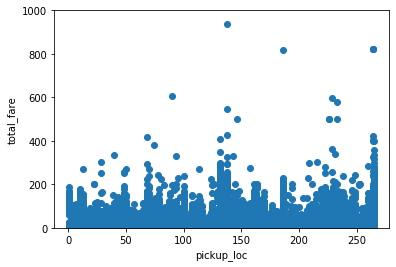

In [39]:
# graph is ploted between pickup_loc and total_fare

plt.scatter(X_train['pickup_loc'], Y_train)
plt.ylim(0,1000)
plt.xlabel('pickup_loc')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

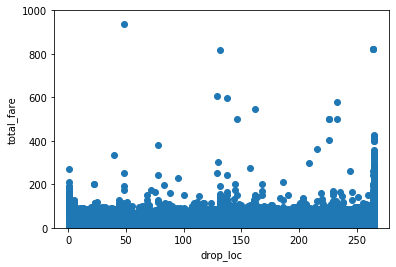

In [40]:
# graph is ploted between drop_loc and total_fare

plt.scatter(X_train['drop_loc'], Y_train)
plt.ylim(0,1000)
plt.xlabel('drop_loc')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

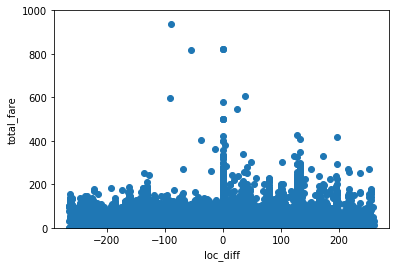

In [41]:
# graph is ploted between loc_diff and total_fare

plt.scatter(X_train['loc_diff'], Y_train)
plt.ylim(0,1000)
plt.xlabel('loc_diff')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

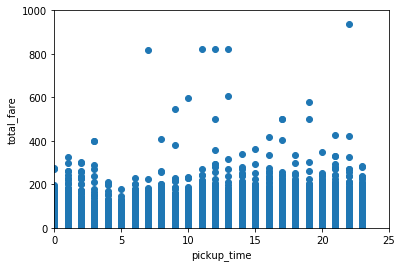

In [42]:
# graph is ploted between pickup_time and total_fare

plt.scatter(X_train['pickup_time'], Y_train)
plt.ylim(0,1000)
plt.xlim(0,25)
plt.xlabel('pickup_time')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

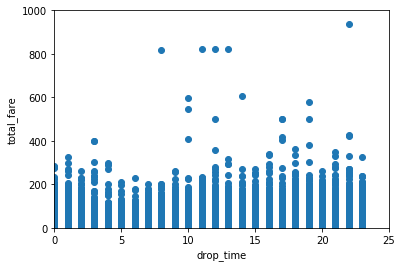

In [43]:
# graph is ploted between drop_time and total_fare

plt.scatter(X_train['drop_time'], Y_train)
plt.ylim(0,1000)
plt.xlim(0,25)
plt.xlabel('drop_time')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

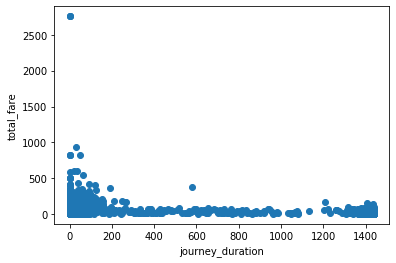

In [44]:
# graph is ploted between journey_duration and total_fare

plt.scatter(X_train['journey_duration'], Y_train)
plt.xlabel('journey_duration')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

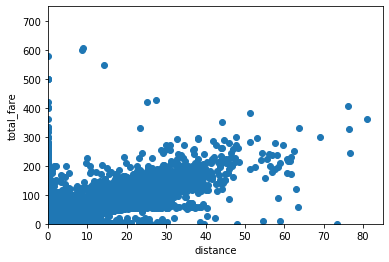

In [45]:
# graph is ploted between distance and total_fare

plt.scatter(X_train['distance'], Y_train)
plt.xlabel('distance')
plt.xlim(0,85)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

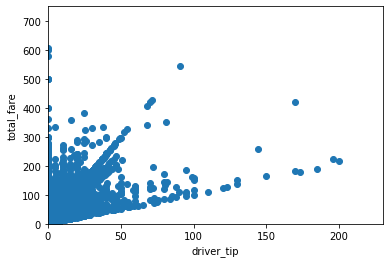

In [46]:
# graph is ploted between driver_tip and total_fare

plt.scatter(X_train['driver_tip'], Y_train)
plt.xlabel('driver_tip')
plt.xlim(0,230)
plt.ylim(0,750)
plt.ylabel('total_fare')

In [47]:
# graph is ploted between mta_tax and total_fare

plt.scatter(X_train['mta_tax'], Y_train)
plt.xlabel('mta_tax')
# plt.xlim(0,230)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

Error in callback <function flush_figures at 0x0000014D512D4D90> (for post_execute):


KeyboardInterrupt: 

Text(0, 0.5, 'total_fare')

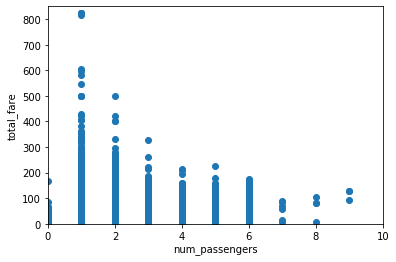

In [48]:
# graph is ploted between num_passengers and total_fare

plt.scatter(X_train['num_passengers'], Y_train)
plt.xlabel('num_passengers')
plt.xlim(0,10)
plt.ylim(0,850)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

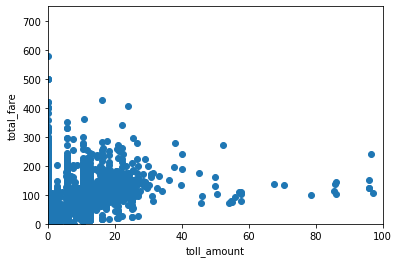

In [49]:
# graph is ploted between toll_amount and total_fare

plt.scatter(X_train['toll_amount'], Y_train)
plt.xlabel('toll_amount')
plt.xlim(0,100)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

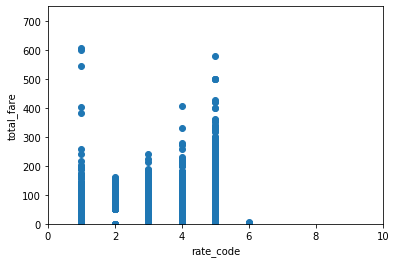

In [50]:
# graph is ploted between rate_code and total_fare

plt.scatter(X_train['rate_code'], Y_train)
plt.xlabel('rate_code')
plt.xlim(0,10)
plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

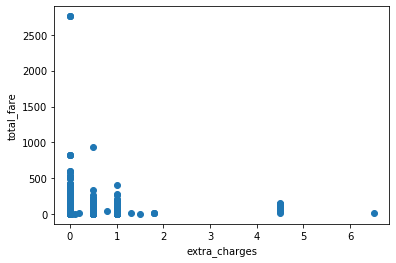

In [51]:
# graph is ploted between extra_charges and total_fare

plt.scatter(X_train['extra_charges'], Y_train)
plt.xlabel('extra_charges')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

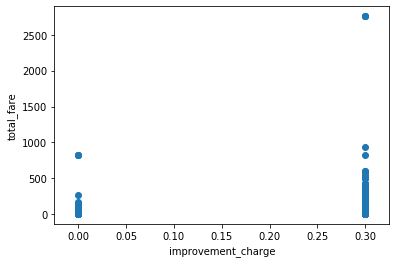

In [52]:
# graph is ploted between improvement and total_fare

plt.scatter(X_train['improvement_charge'], Y_train)
plt.xlabel('improvement_charge')
# plt.xlim(0,100)
# plt.ylim(0,750)
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

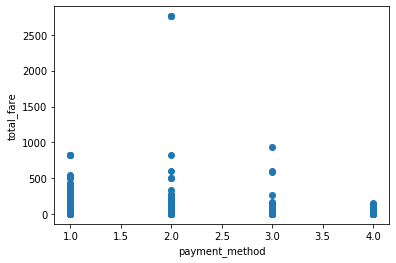

In [53]:
# graph is ploted between payment_method and total_fare

plt.scatter(X_train['payment_method'], Y_train)
plt.xlabel('payment_method')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

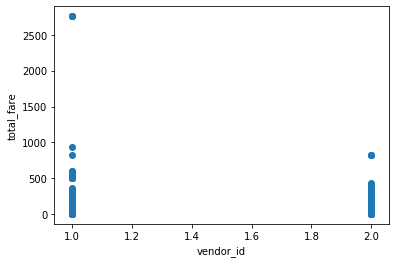

In [54]:
# graph is ploted between vendor_id and total_fare

plt.scatter(X_train['vendor_id'], Y_train)
plt.xlabel('vendor_id')
plt.ylabel('total_fare')

Text(0, 0.5, 'total_fare')

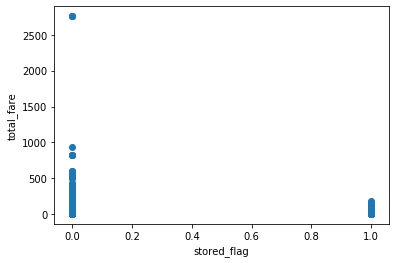

In [55]:
# graph is ploted between stored_flag and total_fare

plt.scatter(X_train['stored_flag'], Y_train)
plt.xlabel('stored_flag')
plt.ylabel('total_fare')

### Manipulating X_train and X_test acccording to visulization

In [34]:
X_train.columns

Index(['vendor_id', 'pickup_loc', 'drop_loc', 'driver_tip', 'mta_tax',
       'distance', 'pickup_time', 'drop_time', 'num_passengers', 'toll_amount',
       'payment_method', 'rate_code', 'stored_flag', 'extra_charges',
       'improvement_charge', 'journey_duration', 'loc_diff'],
      dtype='object')

In [35]:
# dependency found between distance, driver_tip, toll_amount
#So adding columns of it
#X_train['dist_sq'] = X_train['distance'] * X_train['distance']

In [36]:
# dependency found between distance, driver_tip, toll_amount
#So adding columns of it
#X_test['dist_sq'] = X_test['distance'] * X_test['distance']


In [37]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 17 columns):
vendor_id             1048575 non-null float64
pickup_loc            1048575 non-null float64
drop_loc              1048575 non-null float64
driver_tip            1048575 non-null float64
mta_tax               1048575 non-null float64
distance              1048575 non-null float64
pickup_time           1048575 non-null int64
drop_time             1048575 non-null int64
num_passengers        1048575 non-null float64
toll_amount           1048575 non-null float64
payment_method        1048575 non-null float64
rate_code             1048575 non-null float64
stored_flag           1048575 non-null int64
extra_charges         1048575 non-null float64
improvement_charge    1048575 non-null float64
journey_duration      1048575 non-null float64
loc_diff              1048575 non-null float64
dtypes: float64(14), int64(3)
memory usage: 136.0 MB


### Applying Models

In [33]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
import sklearn.model_selection as ms

In [34]:
Xtrain,Xtest, Ytrain,Ytest = ms.train_test_split(X_train,Y_train, test_size=0.2, random_state=100)

In [ ]:
from sklearn.svm import SVR
svr = SVR()
svr.fit(Xtrain, Ytrain)
ypred = svr.predict(Xtest)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [ ]:
RMSR = np.sqrt(metrics.mean_squared_error(Ytrain, svr.predict(Xtrain)))
RMSR

In [ ]:
RMSR = np.sqrt(metrics.mean_squared_error(Ytest, ypred))
RMSR

In [46]:
# Applying Random Forest Regression Model

model2 = RandomForestRegressor(n_estimators=100, random_state=50, n_jobs=-1, max_features='auto', min_samples_leaf=50, oob_score=True)

model2.fit(Xtrain, Ytrain)

prediction3 = model2.predict(Xtest)
prediction4 = model2.predict(Xtrain)

#Y_test = prediction3

In [51]:
model2.score(Xtest, Ytest)

0.9502101554784941

In [47]:
RMSR1=np.sqrt(metrics.mean_squared_error(Ytrain, prediction4))
RMSR1

6.065542309404026

In [48]:
# Root mean square of our prediction on X_train and Y_train is calculated for Linear Regression
RMSR1=np.sqrt(metrics.mean_squared_error(Ytest, prediction3))
RMSR1

3.1913415842620534

In [40]:
from sklearn.model_selection import RandomizedSearchCV
#from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

In [60]:
n_estimators = [int(x) for x in np.linspace(start = 1, stop = 200, num =5)]
n_estimators.append(5)
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 5, 10, 20, 50, 70]
# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
              # 'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap':bootstrap 
              }


In [61]:
est = RandomForestRegressor(n_jobs=-1)
gscv = GridSearchCV(est, random_grid, n_jobs=-1, cv=5)

In [ ]:
gscv.fit(X_train, Y_train)

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model2, X_train, Y_train, cv=10)
score.mean()

In [ ]:
score

In [ ]:
from sklearn.model_selection import cross_val_score
score = cross_val_score(model2, X_train, Y_train, cv=10, scoring='mean_squared_error')
score.mean()

In [ ]:
score

In [ ]:
# Root mean square of our prediction on X_train and Y_train is calculated for Random Forest
RMSR1=np.sqrt(metrics.mean_squared_error(Y_train, prediction4))
RMSR1

In [ ]:
# Root mean square of our prediction on X_train and Y_train is c Random Forest
RMSR1=np.sqrt(metrics.mean_squared_error(prediction2, prediction4))
RMSR1

In [ ]:
# Converting and saving the predictions for Linear Regression

from pandas import DataFrame
C = { 'ID': d2['ID'],
      'total_amount': prediction1,
    }
df = DataFrame(C, columns= ['ID', 'total_amount'])
export_csv = df.to_csv ('SampleSubmission_lin.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)

In [ ]:
# Converting and saving the predictions for Random Forest Regression

from pandas import DataFrame
C = { 'ID': d2['ID'],
      'total_amount': prediction3,
    }
df = DataFrame(C, columns= ['ID', 'total_amount'])
export_csv = df.to_csv ('SampleSubmission_rf.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)

In [ ]:
# Converting and saving the mean of predictions for Linear Regression and Random Forest
from pandas import DataFrame
C = { 'ID': d2['ID'],
      'total_amount': (prediction1+prediction3)/2 ,
    }
df = DataFrame(C, columns= ['ID', 'total_amount'])
export_csv = df.to_csv ('SampleSubmission_rf+lin.csv', index = None, header=True) # here you have to write path, where result file will be stored
print (df)